# Image Preprocessing

In [2]:
IMAGE = '../data/original_images/1.tif'

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Binarization

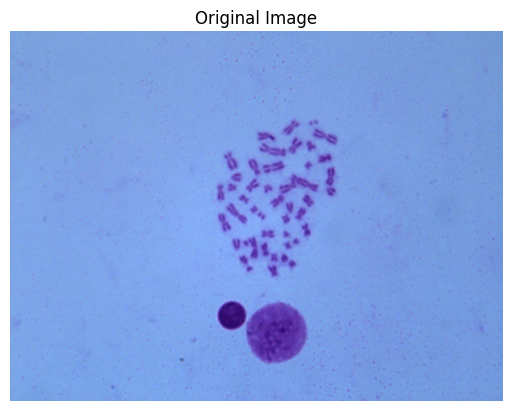

In [4]:
image = cv.imread(IMAGE)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image');

### Simple Tresholding

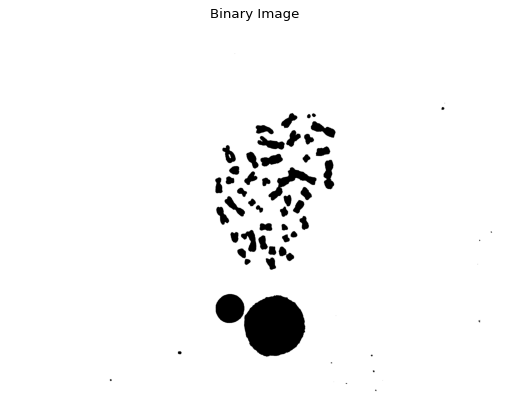

In [5]:
image = cv.imread(IMAGE)
plt.figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
threshold, thresholded_image = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(thresholded_image, cv.COLOR_GRAY2RGB))
plt.title('Binary Image')
plt.axis('off');

### Adaptative

Text(0.5, 1.0, 'Binary Image')

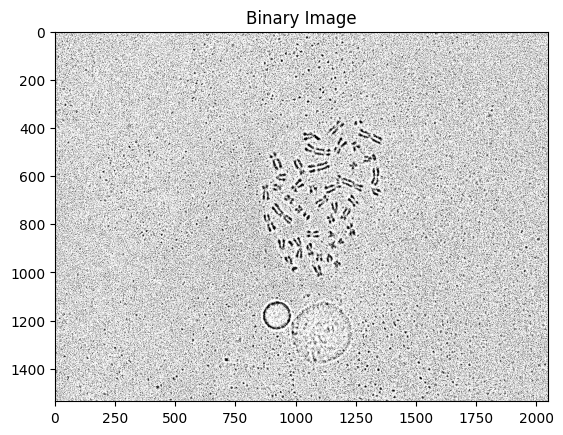

In [6]:
image = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
inverted_image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(cv.cvtColor(inverted_image, cv.COLOR_GRAY2RGB))
plt.title('Binary Image')

## Otsu's Binarization

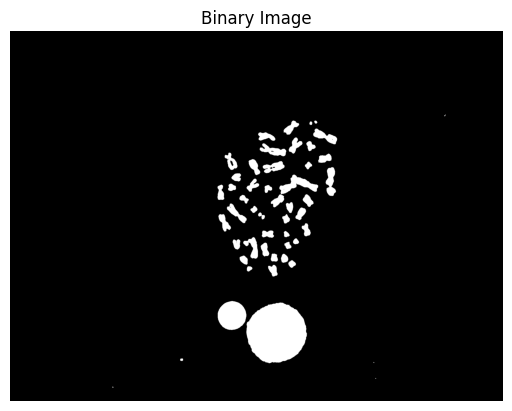

In [7]:
image = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
_, binary_image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.imshow(cv.cvtColor(binary_image, cv.COLOR_GRAY2RGB))
plt.title('Binary Image')
plt.axis('off');

### Otsu's Binarization with Gaussian Filter

(-0.5, 2047.5, 1535.5, -0.5)

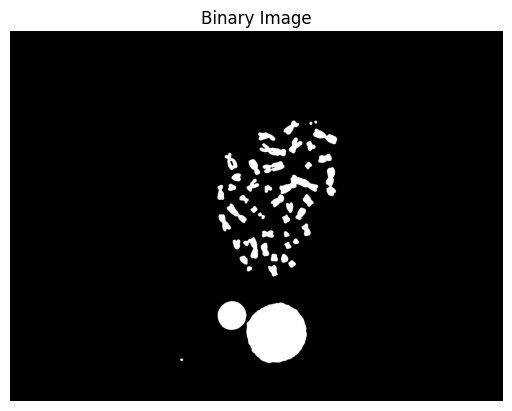

In [12]:
image = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
blurred_image = cv.GaussianBlur(image, (5, 5), 0)
_, binary_image = cv.threshold(blurred_image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
opening = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel)
plt.imshow(cv.cvtColor(opening, cv.COLOR_GRAY2RGB))
plt.title('Binary Image')
plt.axis('off')

(-0.5, 2047.5, 1535.5, -0.5)

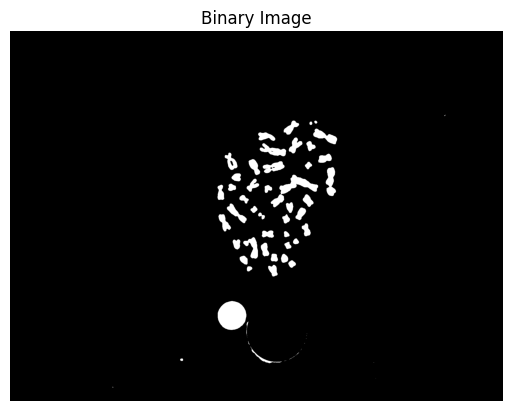

In [14]:
image = cv.imread(IMAGE)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# circles = cv.HoughCircles(
#     gray, cv.HOUGH_GRADIENT, dp=1, minDist=2000, param1=50, param2=28, minRadius=100, maxRadius=200
# )
circles = cv.HoughCircles(
    gray, cv.HOUGH_GRADIENT, dp=1, minDist=2000, param1=50, param2=28, minRadius=100, maxRadius=200
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        # Draw a filled circle over the circular object to remove it
        cv.circle(binary_image, center, radius, (0, 0, 0), -1)

plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

(-0.5, 2047.5, 1535.5, -0.5)

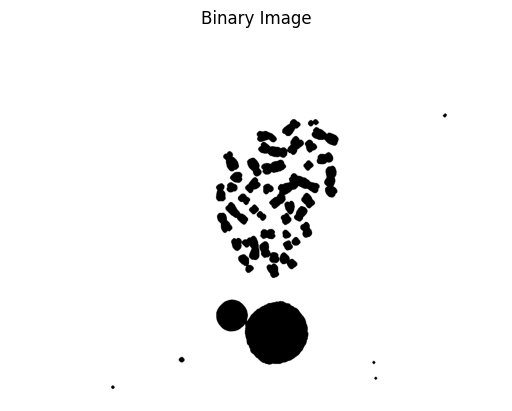

In [10]:
inverted_image = 255 - binary_image

kernel1 = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], np.uint8)

eroded_image = cv.erode(inverted_image, kernel1, iterations=1)

kernel2 = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], np.uint8)

eroded_image = cv.erode(eroded_image, kernel2, iterations=5)
plt.imshow(cv.cvtColor(eroded_image, cv.COLOR_GRAY2RGB))
plt.title('Binary Image')
plt.axis('off')

Chromosome count: 43


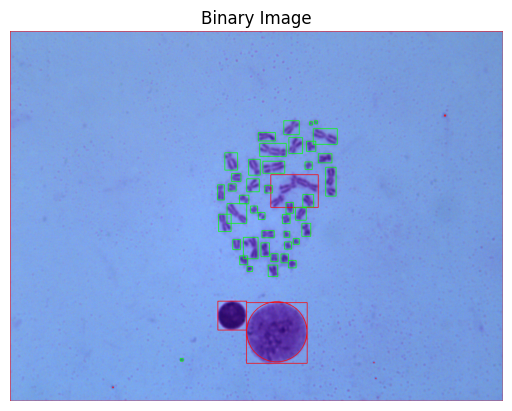

In [11]:
(num_labels, labels, stats, centroids) = cv.connectedComponentsWithStats(binary_image, -1, 8)

ignored_labels = []

img_output = cv.cvtColor(image.copy(), cv.COLOR_RGB2BGR)

chromosome_count = 0

for label in range(num_labels):
    top_left_point = (stats[label, cv.CC_STAT_LEFT], stats[label, cv.CC_STAT_TOP])
    bottom_right_point = (stats[label, cv.CC_STAT_WIDTH] + top_left_point[0], stats[label, cv.CC_STAT_HEIGHT] + top_left_point[1])

    area = stats[label, cv.CC_STAT_AREA]
    if area > 5000 or area < 30:
        img_output = cv.rectangle(img_output, top_left_point, bottom_right_point, (255, 0, 0), 2)
    else:
        img_output = cv.rectangle(img_output, top_left_point, bottom_right_point, (0, 255, 0), 2)
        chromosome_count += 1

plt.imshow(img_output)
plt.title('Binary Image')
plt.axis('off')
print('Chromosome count:', chromosome_count)